In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as c
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
directory = "n5/"

if directory == "n8/":
    title = "($n=8,12,16$)"
    save = "(n=8_12_16)"

if directory == "n7/":
    title = "$n=7,11,15$"
    save = "(n=7_11_15)"

if directory == "n6/":
    title = "$n=6,10,14$"
    save = "(n=6_10_14)"
    
if directory == "n5/":
    title = "$n=5,9,13,17$"
    save = "(n=5_9_13_17)"
    
#Axis Labels
gridy = [0,1,2,3,4,5,6,7,8]
gridx = [0,1,2,3,4,5,6]

beta = ["0.10","0.15","0.20","0.25","0.30","0.35","0.40"]
E = [50,45,40,35,30,25,20,15,10]

#dataframe GR
dataGR = pd.read_excel(directory + "Dominant_mode.xlsx")
dataGR.index = E

In [3]:
labels = pd.read_excel(f"{directory}AE_mode.xlsx")
labels.index = E
labels = np.array(labels)

<IPython.core.display.Javascript object>


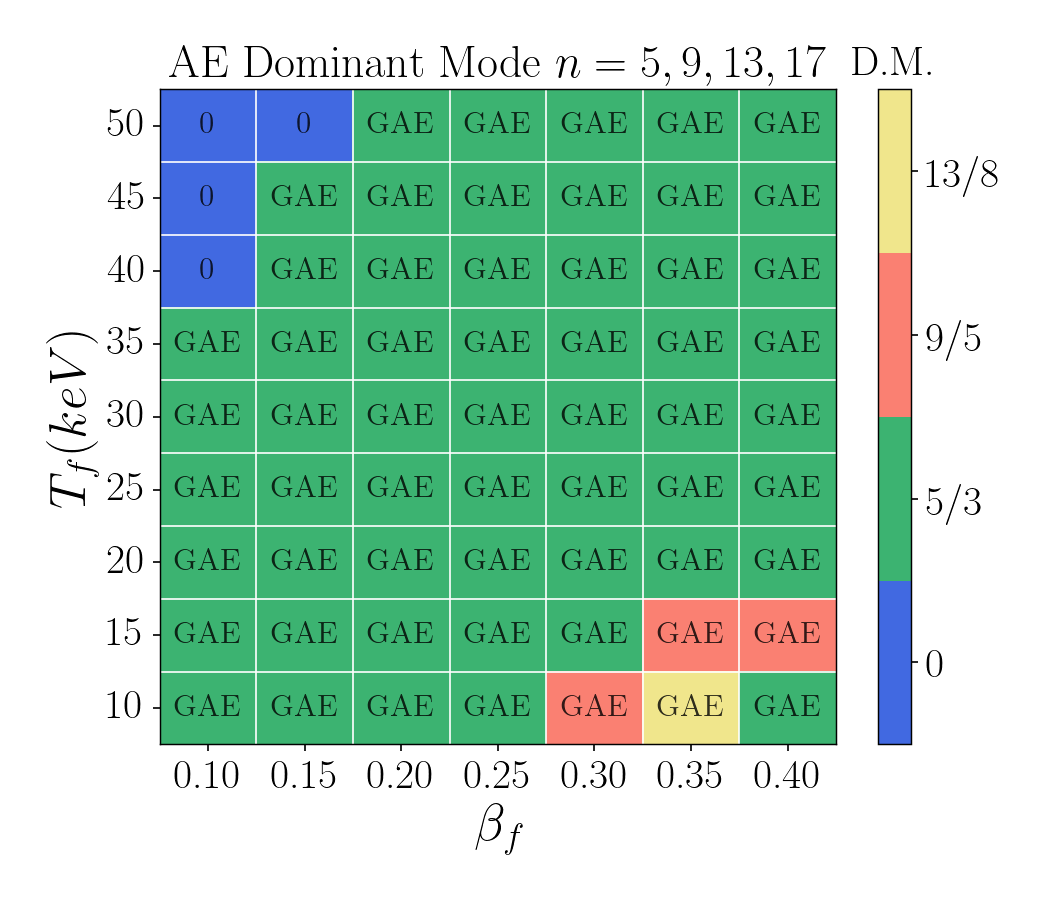

In [6]:
%matplotlib notebook
plt.figure(figsize=(7,6))

x = [0.5,1.5,2.5,3.5,4.5,5.5,6.5]
annot_kws={'fontsize':15, 
           'fontstyle':'italic',  
           'color':"k",
           'alpha':0.8, 
           'rotation':"horizontal",
           'verticalalignment':'center'}

cbar_kws = {"orientation":"vertical", 
            'label':'$\gamma$',
            "shrink":1,
            "ticks":[0.2,0.4,0.6,0.8,1.0,1.2,1.4],
            "pad":0.05,
           }

colors = {"royalblue":0,"mediumseagreen":1,"salmon":2,"khaki":3}
l_colors = sorted(colors, key=colors.get)
cMap = c.ListedColormap(l_colors)

ax = sns.heatmap(dataGR, annot=labels, fmt="", annot_kws = annot_kws,
            linewidths=0, cmap = cMap, cbar_kws = cbar_kws,vmin = 0, vmax=len(colors))

cbar = ax.collections[0].colorbar

# Remove the existing colorbar label
cbar.ax.set_ylabel('')
cbar.set_ticklabels(["0","5/3","9/5","13/8"])
cbar.set_ticks([0.5,1.5,2.5,3.5])

# Add a new label at the top of the colorbar
cbar.ax.text(0.5, 1.01, r'D.M.', ha='center', va='bottom', 
             transform=cbar.ax.transAxes)

# Add borderlines to the colorbar
cbar.outline.set_visible(True)
cbar.outline.set_linewidth(0.7)
cbar.outline.set_edgecolor('black')

# Borderlines to heatmap
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_linewidth(0.7)
ax.spines['bottom'].set_linewidth(0.7)
ax.spines['left'].set_linewidth(0.7)
ax.spines['right'].set_linewidth(0.7)

plt.title(f"AE Dominant Mode {title}", fontsize=22)
plt.xlabel(r"$\beta_f$",fontsize=25)
plt.ylabel(r"$T_{f} (keV)$",fontsize=25)
plt.yticks(rotation=0)
plt.xticks(x,beta)

for i in range(0,len(gridx)):
    plt.axvline(gridx[i],color="w",linewidth=0.8)
    
for i in range(0,len(gridy)):
    plt.axhline(gridy[i],color="w",linewidth=0.8)

plt.show()
plt.savefig(directory + f"Dominant_modes_{save}.jpg",dpi=800)